In [14]:
import cv2
import argparse
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [15]:
model = load_model('/content/drive/MyDrive/models/generator_model.h5')

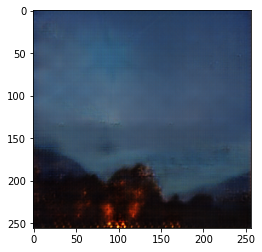

In [16]:
def generate_images(test_input):
    image = tf.io.read_file(test_input)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [256, 256], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    image = tf.expand_dims(image, axis = 0)
    image = (image / 127.5) - 1
    
    prediction = model(image, training=True)
    prediction = np.squeeze(prediction, axis = 0)
    prediction = (prediction) * 0.5 + 0.5
    plt.imshow(prediction)

generate_images('/content/input/manzare2.jpeg')